# Aula 02 - Análise Exploratória dos Dados

In [2]:
import pandas as pd

fonte = './dados/MICRODADOS_ENEM_2019_SAMPLE_43278.csv'

dados = pd.read_csv(fonte)

In [5]:
dados.query('NU_IDADE <= 14')['SG_UF_RESIDENCIA'].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
GO     7
PB     7
AM     4
MT     4
DF     4
SE     3
PR     3
TO     3
RO     2
AL     2
SC     2
RJ     1
RS     1
RN     1
MS     1
AC     1
ES     1
AP     1
Name: SG_UF_RESIDENCIA, dtype: int64

In [8]:
alunos_menor_quatorze = dados.query('NU_IDADE <= 14')['SG_UF_RESIDENCIA']
alunos_menor_quatorze.value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
AM    0.027586
MT    0.027586
DF    0.027586
SE    0.020690
PR    0.020690
TO    0.020690
RO    0.013793
AL    0.013793
SC    0.013793
RJ    0.006897
RS    0.006897
RN    0.006897
MS    0.006897
AC    0.006897
ES    0.006897
AP    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

<AxesSubplot:ylabel='SG_UF_RESIDENCIA'>

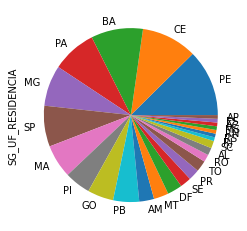

In [16]:
alunos_menor_quatorze.value_counts().plot.pie()

<AxesSubplot:>

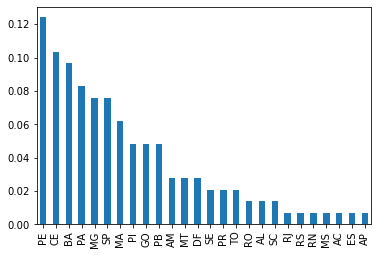

In [18]:
alunos_menor_quatorze.value_counts(normalize=True).plot.bar()

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

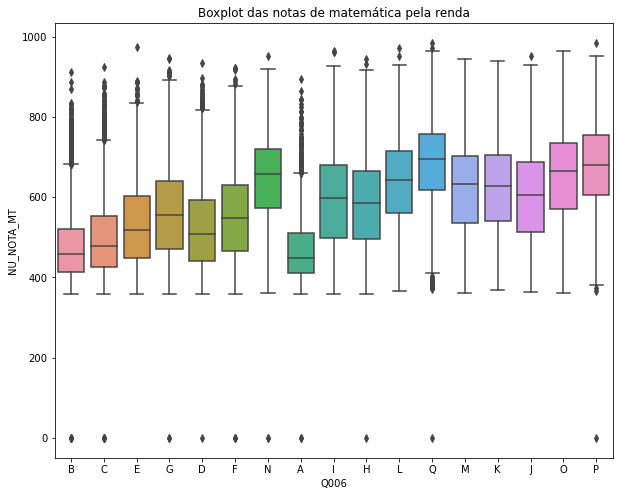

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
sns.boxplot(x='Q006', y='NU_NOTA_MT', data=dados)
plt.title('Boxplot das notas de matemática pela renda')

In [23]:
renda = dados['Q006'].unique()
renda.sort()
print(renda)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q']


Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

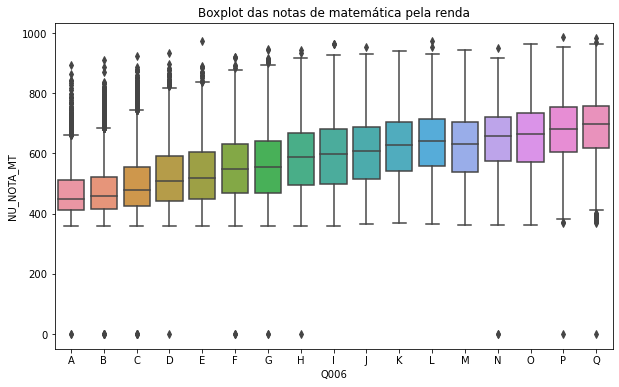

In [25]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = dados, order = renda)
plt.title('Boxplot das notas de matemática pela renda')

In [28]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

dados[provas].sum()

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [33]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot da nota total pela renda')

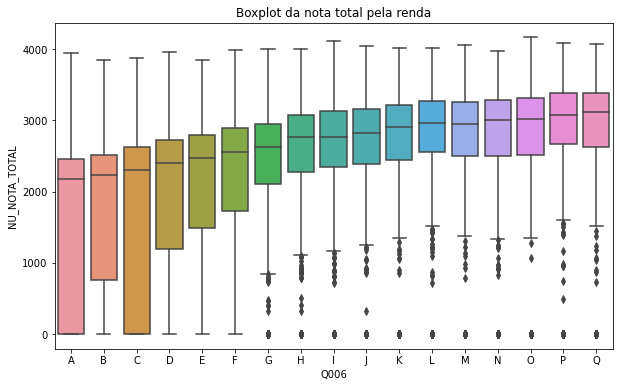

In [34]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados, order = renda)
plt.title('Boxplot da nota total pela renda')

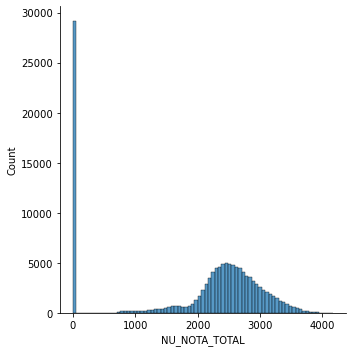

In [35]:
sns.displot(dados, x = 'NU_NOTA_TOTAL')

In [38]:
provas.append('NU_NOTA_TOTAL')
dados[provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [41]:
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot da nota total pela renda')

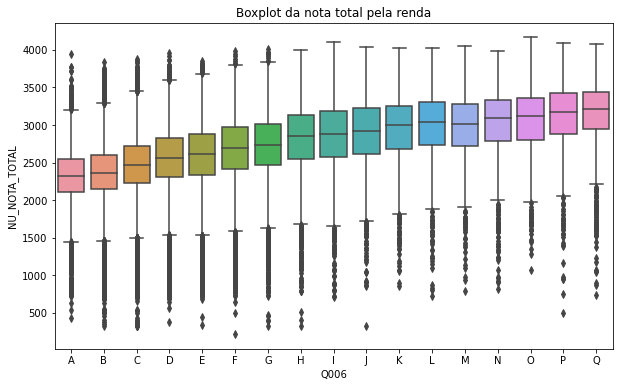

In [42]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda)
plt.title('Boxplot da nota total pela renda')

Text(0.5, 1.0, 'Boxplot da nota total pela renda')

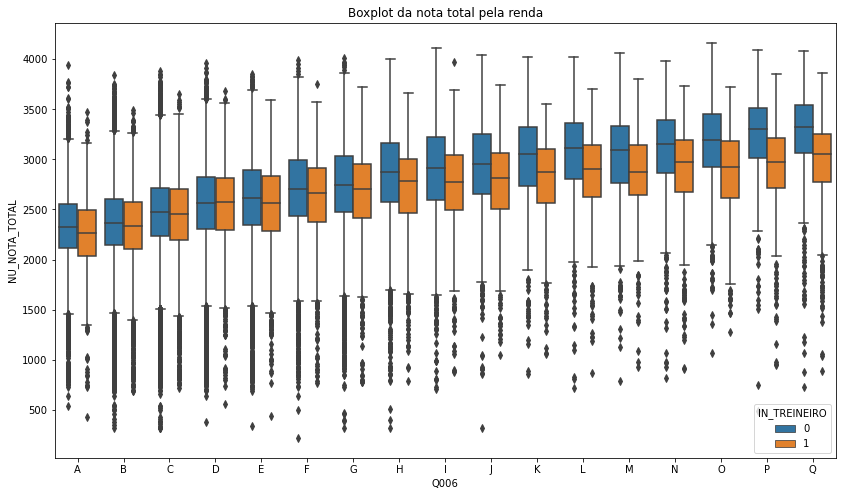

In [44]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, hue = 'IN_TREINEIRO', order = renda)
plt.title('Boxplot da nota total pela renda')